In [170]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns
sns.set(font_scale=1.3)


#### 1. Data

In [3]:
from sklearn.datasets import load_iris

In [22]:
raw_data = load_iris()
raw_data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [49]:
feature_names = [name.replace(' ','_')[:-5] for name in raw_data['feature_names']]

target_names = raw_data['target_names']

In [26]:
target_map = {num:raw_data['target_names'][num] for num in range(len(raw_data['target_names']))}
df_raw['target_names'] = df_raw['target'].map(target_map)

In [30]:
df_raw['target_names'].value_counts()

setosa        50
versicolor    50
virginica     50
Name: target_names, dtype: int64

#### 2. Train/Test

In [121]:
df_raw.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'target',
       'target_names'],
      dtype='object')

In [122]:
df = df_raw.copy()

data = df[['sepal_length', 'sepal_width', 'target']]
target = data.pop('target')
data = data.values
target = target.values.astype('int8')

In [123]:
from sklearn.model_selection import train_test_split

In [124]:
X_train, X_test, y_train, y_test = train_test_split(data, target, random_state=42, test_size=0.2, stratify=target)

print (f'Data shape: {data.shape}')
print (f'Target shape: {target.shape}\n')
print(f'X_train: {X_train.shape}')
print(f'y_train: {y_train.shape}')
print(f'X_test: {X_test.shape}')
print(f'y_test: {y_test.shape}\n')

print (f'Train ratio: {len(X_train)/len(data)}')
print (f'Test ratio: {len(X_test)/len(data)}\n')

print(f'target dist:')
print (f'{pd.Series(target).value_counts() / len(target)}\n')

print(f'train target dist:')
print (f'{pd.Series(y_train).value_counts() / len(y_train)}\n')

print(f'test target dist:')
print (f'{pd.Series(y_test).value_counts() / len(y_test)}\n')

Data shape: (150, 2)
Target shape: (150,)

X_train: (120, 2)
y_train: (120,)
X_test: (30, 2)
y_test: (30,)

Train ratio: 0.8
Test ratio: 0.2

target dist:
0    0.333333
1    0.333333
2    0.333333
dtype: float64

train target dist:
0    0.333333
2    0.333333
1    0.333333
dtype: float64

test target dist:
0    0.333333
2    0.333333
1    0.333333
dtype: float64



### 3. Model - decision tree

In [159]:
from IPython.display import Image
from mlxtend.plotting import plot_decision_regions
from six import StringIO
from sklearn.tree import export_graphviz
import pydotplus


In [160]:
from sklearn.tree import DecisionTreeClassifier

In [161]:
classifier = DecisionTreeClassifier(max_depth=5, random_state=42)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, random_state=42)

In [162]:
prediction = classifier.predict(X_test)

In [163]:
classifier.score(X_train, y_train)

0.875

In [142]:
classifier.score(X_test, y_test)

0.6333333333333333

In [143]:
from sklearn.metrics import accuracy_score

In [144]:
accuracy_score(y_test, prediction)

0.6333333333333333

### 4. Function, map and comparison

In [190]:
def train_test_accuracy(X_train, y_train, X_test, y_test, max_depth = 5):
    
    train_acc = []
    test_acc = []
    depth = []
    
    for a in range(1,max_depth+1):
        classifier = DecisionTreeClassifier(max_depth=a, random_state=42)
        classifier.fit(X_train, y_train)
        prediction = classifier.predict(X_test)
        
        depth.append(a)
        train_acc.append (classifier.score(X_train, y_train))
        test_acc.append (classifier.score(X_test, y_test))
        
    df_accuracy = pd.DataFrame(data={'depth': depth, 'train_accuracy': train_acc, 'test_accuracy': test_acc})
    
    # plot train/test accuracy
    plt.figure(figsize=(12,7))
    plt.title('Train vs Test accuracy')
    plt.plot(df_accuracy['depth'], df_accuracy['train_accuracy'], label= 'train_acc')
    plt.plot(df_accuracy['depth'], df_accuracy['test_accuracy'], label= 'test_acc')
    plt.legend()
    plt.ylabel('accuracy')
    plt.xlabel('max_depth');

    
    return df_accuracy

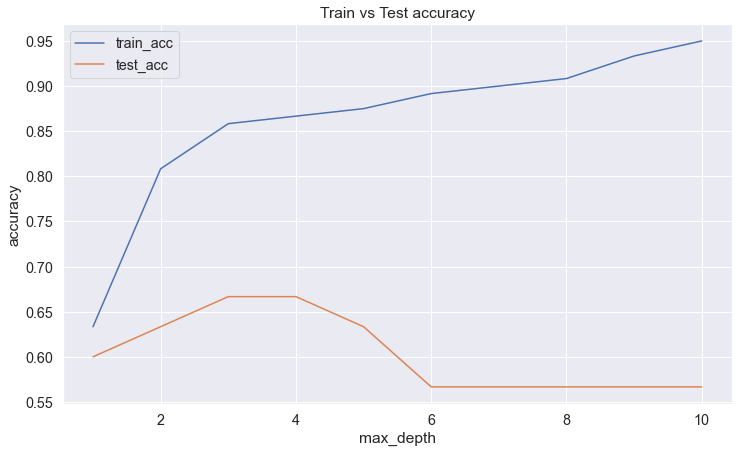

In [191]:
df_accuracy = train_test_accuracy(X_train, y_train, X_test, y_test, max_depth = 10)

In [189]:
df_accuracy

,depth,train_accuracy,test_accuracy
0,1,0.633333,0.600000
1,2,0.808333,0.633333
2,3,0.858333,0.666667
3,4,0.866667,0.666667
4,5,0.875000,0.633333
5,6,0.891667,0.566667
6,7,0.900000,0.566667
7,8,0.908333,0.566667
8,9,0.933333,0.566667
